In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats

from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from subprocess import check_output

print(check_output(["ls", "input"]).decode("utf8")) #check the files available in the directory

data_description.txt
sample_submission.csv
test.csv
train.csv



In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
train_ID = train['Id']
test_ID = test['Id']

train.drop('Id', axis=1, inplace = True)
test.drop('Id', axis=1, inplace = True)

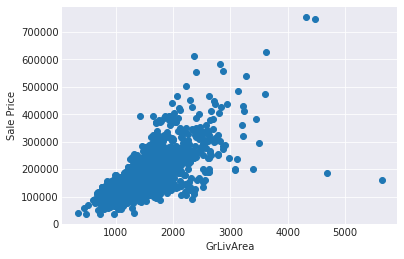

In [4]:
# Remove Outliers 

fig, ax = plt.subplots()

ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

In [5]:
# train = train.drop

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)

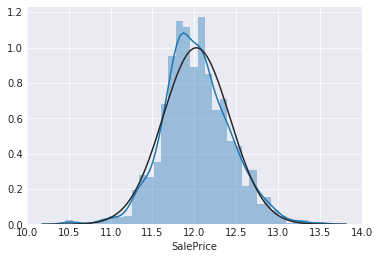

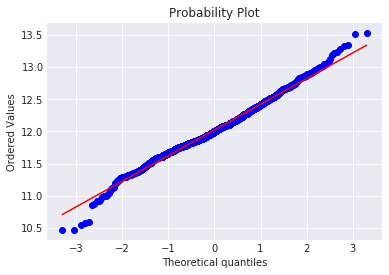

In [6]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'] , fit=norm);

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [7]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
# all_data.head(5)

In [8]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [9]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
# missing_data.head(20)
# len(all_data)

In [10]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

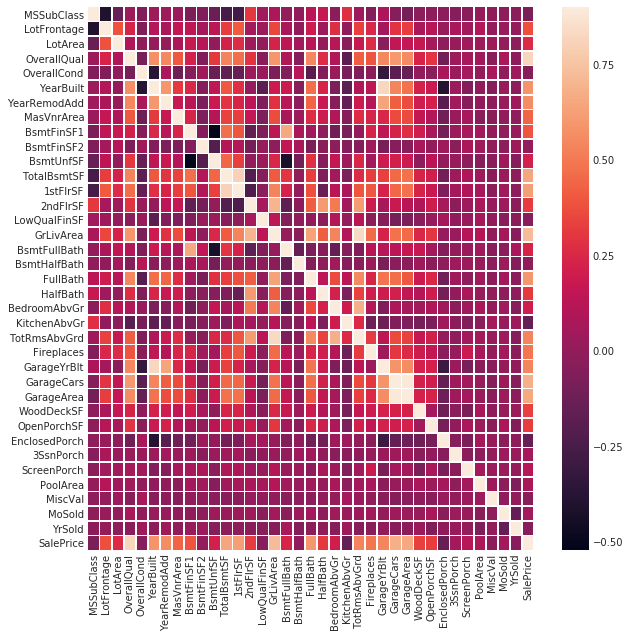

In [11]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corrmat, vmax=0.9, ax=ax, linewidths=.5)

In [12]:
all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
for col in ("GarageType", 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('none')

In [14]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [15]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtHalfBath', 'BsmtFullBath'):
    all_data[col] = all_data[col].fillna(0)

In [16]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [17]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [18]:
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

In [19]:
all_data = all_data.drop("Utilities", axis=1)

In [20]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [21]:
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

In [22]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [23]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [24]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [25]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [26]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [27]:
all_data.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,1,3,1Fam,4,3,706.000,0.000,...,WD,0,1,8,856.000,0,2003,2003,2,2566.000
1,1262,0,0,1,3,1Fam,4,1,978.000,0.000,...,WD,0,1,6,1262.000,298,1976,1976,1,2524.000
2,920,866,0,1,3,1Fam,4,2,486.000,0.000,...,WD,0,1,6,920.000,0,2001,2002,2,2706.000
3,961,756,0,1,3,1Fam,1,3,216.000,0.000,...,WD,0,1,7,756.000,0,1915,1970,0,2473.000
4,1145,1053,0,1,4,1Fam,4,0,655.000,0.000,...,WD,0,1,9,1145.000,192,2000,2000,2,3343.000


In [28]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Check the skew of all numerical features

skew_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
# skew_feats
skewness = pd.DataFrame({"Skew":skew_feats})

### Box Cox Transformation of highly skewed features

In [29]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 59 skewed numerical features to Box Cox transform


In [30]:
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

In [31]:
all_data = pd.get_dummies(all_data)

In [32]:
# Getting the new train and test sets.
train = all_data[:ntrain]
test = all_data[:ntest]

### Modelling

In [33]:
# Import librairies

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.model_selection import KFold, train_test_split, cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

ImportError: No module named 'xgboost'

In [ ]:
# Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse

## Base Models

### LASSO Regression :

In [34]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

### Elastic Net Regression :

In [35]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

### Kernel Ridge Regression :

In [36]:
KKR = KernelRidge(alpha=0.6, kernel="polynomial", degree=2, coef0=2.5)

### Gradient Boosting Regression :

In [37]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                                   max_depth=4, max_features="sqrt", min_samples_leaf=15, min_samples_split=10, 
                                  loss='huber', random_state=5)

### XGBoost :